<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/Copie_de_2023_03_23_Small_group_support_Bases_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Dataset de maisons, avec leurs caractéristiques et leur prix
# 4 maisons n'ont pas de prix (nan)
# => on cherche à prédire les prix manquants

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"
df_main = pd.read_csv(link)
df_main

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Séparer le df en 2 :
# les lignes complètes d'un côté (21609 lignes)

df_houses = df_main[df_main['price'].notnull()]
df_houses['flag'] = "Known price"
df_houses.shape

<ipython-input-50-e01e233f7831>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses['flag'] = "Known price"


(21609, 22)

In [ ]:
# et celles dont on ne connaît pas le prix de l'autre (4 lignes)

df_nan = df_main[df_main['price'].isna()]
df_houses['flag'] = "Predicted price"
df_nan.shape

<ipython-input-51-e38d0c95a013>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses['flag'] = "Predicted price"


(4, 21)

In [ ]:
# Quelles colonnes (features) seraient pertinentes pour essayer de calculer le prix d'une maison ?
# Bon sens + dataviz

df_houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'flag'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='price', ylabel='Count'>

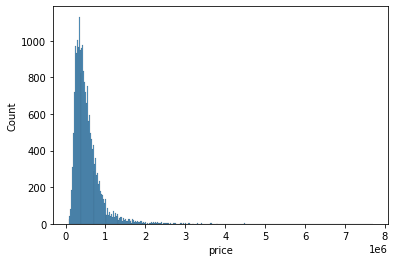

In [ ]:
# Première analyse de différentes variables pour avoir une idée du contenu du dataset
# D'abord une distribution des prix (histplot, boxplot...)

sns.histplot(data=df_houses, x='price')

<Axes: xlabel='yr_built', ylabel='Count'>

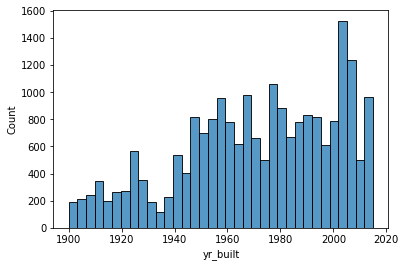

In [ ]:
# Année de construction
sns.histplot(data=df_houses, x='yr_built')

<Axes: xlabel='yr_renovated', ylabel='Count'>

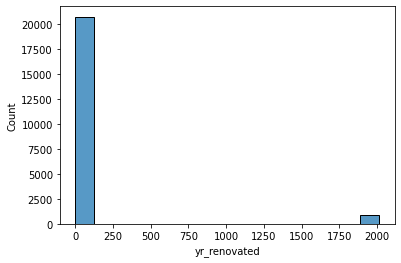

In [ ]:
# Année de rénovation : la plupart sont à 0... Pourquoi ?
sns.histplot(data=df_houses, x='yr_renovated')

In [ ]:
# 96% des maisons n'ont pas d'année de rénovation !
# On peut décider de ne pas tenir compte de cette colonne
df_houses['yr_renovated'].value_counts(normalize=True).round(2)*100

0       96.0
2014     0.0
2013     0.0
2003     0.0
2005     0.0
        ... 
1951     0.0
1959     0.0
1948     0.0
1954     0.0
1944     0.0
Name: yr_renovated, Length: 70, dtype: float64

<Axes: xlabel='sqft_living', ylabel='price'>

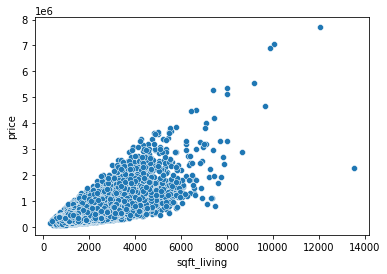

In [ ]:
# Un premier aperçu de la corrélation entre le prix et la surface habitable
# La surface semble avoir un gros impact sur le prix (logique...)
sns.scatterplot(data=df_houses, x='sqft_living', y='price')

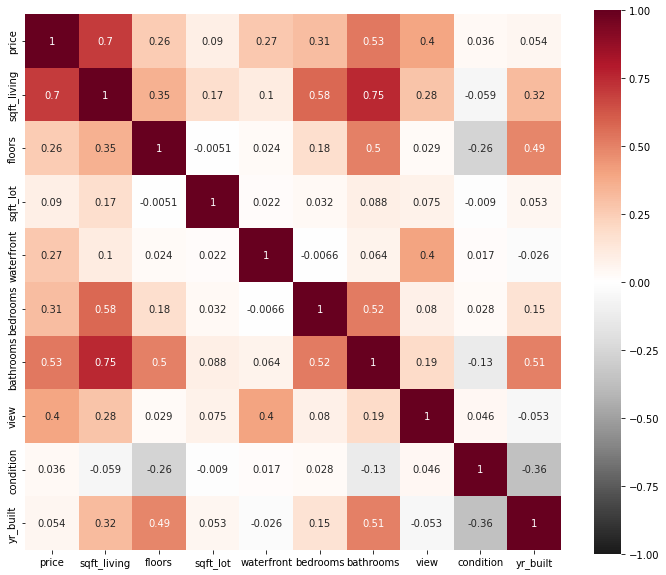

In [ ]:
# Analyse des coefficients de corrélation entre le prix
# et quelques variables qui semblent pertinentes à première vue

sample_columns = ['price', 'sqft_living', 'floors', 'sqft_lot', 'waterfront',
                  'bedrooms', 'bathrooms', 'view', 'condition', 'yr_built']

fig, ax = plt.subplots(figsize=(12, 10))
color = sns.color_palette("RdGy_r", as_cmap=True)
sns.heatmap(df_houses[sample_columns].corr(), vmin=-1, vmax=1, center=0, annot=True, square=True, cmap=color)
plt.show()

In [ ]:
# Les variables qui ont la corrélation la plus forte avec le prix sont :
correlated_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'floors', 'view']

In [ ]:
# Algo de régression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# X : variables d'entrée
X = df_houses[correlated_columns]

# y : cible du calcul
y = df_houses['price']

# Séparer le dataset en 4 parties
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 21609
The length of the train dataset is   : 16206
The length of the test dataset is    : 5403


In [ ]:
# Instanciation et entraînement du modèle de régression linéaire
modelLR = LinearRegression().fit(X, y)

In [ ]:
# Calcul des scores
# Ils sont proches l'un de l'autre (bon point), mais ils sont moyens
# Il faudrait essayer de les améliorer en modifiant par exemple les données en entrée (les colonnes de X)
# et/ou les paramètres du modèle (= hyperparameters tuning)

print("Score for the Train dataset :", modelLR.score(X_train, y_train))
print("Score for the Test dataset :", modelLR.score(X_test, y_test))

Score for the Train dataset : 0.5573790397153533
Score for the Test dataset : 0.5648635050678839


In [ ]:
# Une fois qu'on obtient un modèle qui nous paraît satisfaisant,
# on peut passer à la prédiction
# Générer un X à partir de df_nan (maisons qui n'ont pas de prix)

X_nan = df_nan[correlated_columns]
X_nan

,bedrooms,bathrooms,sqft_living,waterfront,floors,view
21609,4,2.50,2310,0,2.0,0
21610,2,0.75,1020,0,2.0,0
21611,3,2.50,1600,0,2.0,0
21612,2,0.75,1020,0,2.0,0


In [ ]:
# Calculer les 4 prix manquants et les stocker dans la colonne price
# (= écraser les 4 nan par les prédictions de l'algo)

df_nan['price'] = modelLR.predict(X_nan).round(0)
df_nan

<ipython-input-66-2851a6bf0a13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['price'] = modelLR.predict(X_nan).round(0)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21609,6600060120,20150223T000000,562675.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,281760.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,410839.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,281760.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


<Axes: xlabel='yr_built', ylabel='price'>

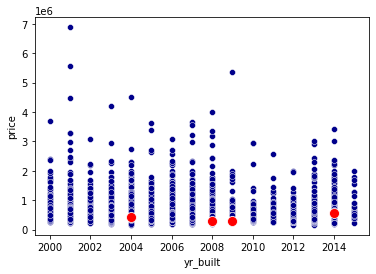

In [ ]:
# Étape supplémentaire de vérification
# Voir où se situent les 4 prix prédits par rapport au reste des maisons
# Les 4 maisons ont été construites après 2004, dont on peut filtrer le graphique après 2000
# pour avoir une meilleure lisibilité

sns.scatterplot(data=df_houses[df_houses['yr_built'] >= 2000], x='yr_built', y='price', color='darkblue')
sns.scatterplot(data=df_nan, x='yr_built', y='price', color='red', s=100)

In [ ]:
# On remarque que nos 4 prix prédits sont dans la fourchette très basse, normal ou non ?
# De toute façon pour l'instant les scores obtenus par l'algo sont très moyens
# Pour y remédier : tout recommencer... tuning tuning :)